In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%load_ext tensorboard.notebook

In [2]:
N = 100
epochs = 200
batch_size = 20
Xdata = np.arange(0, 1, 1/N).reshape((N,1))

In [3]:
def get_batch(data, size):
    duration = len(data)
    for i in range(0,duration//size):
        idx = i*size + np.random.randint(0,10,(1))[0]
        yield data[idx:idx+size]

In [4]:
X = tf.placeholder(float, [None, 1], name='input')

weights = {
    'h1': tf.Variable(tf.random_normal([1,100])),
    'wout': tf.Variable(tf.random_normal([100,1]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([100])),
    'bout': tf.Variable(tf.random_normal([1]))
}

layer1 = tf.add(tf.matmul(X, weights['h1']), biases['b1'])
layer1 = tf.nn.sigmoid(layer1)
Nout = tf.add(tf.matmul(layer1, weights['wout']), biases['bout'])
dNdX = tf.gradients(Nout,X)
d2NdX2 = tf.gradients(tf.gradients(Nout,X),X)
#cost = tf.reduce_mean(tf.square( (A+X*Ypred)-(Ypred+X*tf.gradients(Ypred,X)) ))
cost = tf.reduce_mean(tf.square( (2*Nout+4*X*dNdX+X*X*d2NdX2+X+X*X*Nout) ))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        epoch_loss = 0
        for step in range(N//batch_size):
            for inputX in get_batch(Xdata, batch_size):
                _, loss = sess.run([optimizer, cost], feed_dict={X:inputX})
                epoch_loss += loss
        if (epoch%10 == 0):
            print('Epoch', epoch, 'completed out of', epochs, 'with a loss of ', loss)

    saver = tf.train.Saver()
    saver.save(sess, 'my_test_model')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 0 completed out of 200 with a loss of  1805.9622
Epoch 10 completed out of 200 with a loss of  10.754454
Epoch 20 completed out of 200 with a loss of  2.001671
Epoch 30 completed out of 200 with a loss of  0.0016238978
Epoch 40 completed out of 200 with a loss of  0.09949043
Epoch 50 completed out of 200 with a loss of  0.039999522
Epoch 60 completed out of 200 with a loss of  0.03717178
Epoch 70 completed out of 200 with a loss of  0.07493901
Epoch 80 completed out of 200 with a loss of  0.034697376
Epoch 90 completed out of 200 with a loss of  0.037209913
Epoch 100 completed out of 200 with a loss of  0.015638804
Epoch 110 completed out of 200 with a loss of  0.016387913
Epoch 120 completed out of 200 with a loss of  0.029046828
Epoch 130 completed out of 200 with a loss of  0.024972826
Epoch 140 completed out of 200 with a loss of  0.024389047
Epoch 150 compl

In [5]:
# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "my_test_model")
    print("Model restored.")
    xtest = np.arange(0, np.pi, 1/200).reshape((629,1))
    Y = sess.run([Nout], feed_dict={X:xtest})
    Y = np.asarray(Y)[0]
    #Compute Artificial Neural Network solution
    ANNSoln = xtest + xtest*xtest*Y
    #Compute exact solution
    exactSoln = np.sin(xtest)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from my_test_model
Model restored.


Text(0.5, 1.0, 'ANN Solution V.S. Exact Solution')

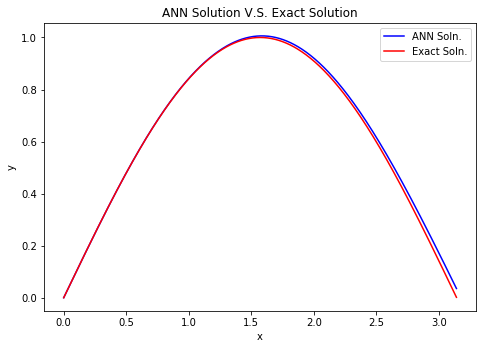

In [6]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([1, 1, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(xtest, ANNSoln, 'b',label="ANN Soln.")
axes.plot(xtest, exactSoln, 'r',label="Exact Soln.")
axes.legend()
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('ANN Solution V.S. Exact Solution')